<a href="https://colab.research.google.com/github/ojasviG/Stats/blob/main/DAP_CA1_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import io
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving project_sales.csv to project_sales (1).csv


# TASK 1

In [ ]:
Sales = pd.read_csv('project_sales.csv')

In [ ]:
Sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,NaN,03/03/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02 August 2019,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,NaN,1/29/2019,01:46:00 PM,Ewallet,40.35,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,NaN,03/02/2019,05:16:00 PM,Ewallet,973.80,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,02/09/2019,01:22:00 PM,Cash,31.84,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,03:33:00 PM,Cash,65.82,4.1


In [ ]:
Sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,Rating
count,929.000000,926.00000,1000.000000,931.000000,922.00000,1000.00000
mean,55.639365,5.50216,15.379369,319.081195,310.83602,6.97270
std,26.423487,2.90712,11.708825,243.436000,235.00245,1.71858
min,10.080000,1.00000,0.508500,10.678500,10.17000,4.00000
25%,33.210000,3.00000,5.924875,123.789750,119.72250,5.50000
50%,54.920000,5.00000,12.088000,251.716500,245.63000,7.00000
75%,77.680000,8.00000,22.445250,467.428500,456.98750,8.50000
max,99.960000,10.00000,49.650000,1042.650000,993.00000,10.00000


In [ ]:
Sales.count()

Invoice ID       1000
Branch           1000
City             1000
Customer type    1000
Gender           1000
Product line     1000
Unit price        929
Quantity          926
Tax 5%           1000
Total             931
Date             1000
Time             1000
Payment          1000
cogs              922
Rating           1000
dtype: int64

In [ ]:
Sales.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity         float64
Tax 5%           float64
Total            float64
Date              object
Time              object
Payment           object
cogs             float64
Rating           float64
dtype: object

In [ ]:
Sales.size

15000

In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     929 non-null    float64
 7   Quantity       926 non-null    float64
 8   Tax 5%         1000 non-null   float64
 9   Total          931 non-null    float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           922 non-null    float64
 14  Rating         1000 non-null   float64
dtypes: float64(6), object(9)
memory usage: 117.3+ KB


# Unit Price, Quantity, Total and cogs are missing values

In [ ]:
Sales.isnull().sum()

Invoice ID        0
Branch            0
City              0
Customer type     0
Gender            0
Product line      0
Unit price       71
Quantity         74
Tax 5%            0
Total            69
Date              0
Time              0
Payment           0
cogs             78
Rating            0
dtype: int64

In [ ]:
Sales.dropna(subset=['Quantity'], inplace=True)
Sales.dropna(subset=['Unit price'], inplace=True)
Sales.dropna(subset=['Total'], inplace=True)
Sales.dropna(subset=['cogs'], inplace=True)

In [ ]:
Sales.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
Rating           0
dtype: int64

In [ ]:
Sales.size

10620

# Removing Invoice, Date and Branch as they are redundant

In [ ]:
Sales.drop(columns='Invoice ID', inplace=True)

In [ ]:
Sales.drop(columns='Date', inplace=True)

In [ ]:
Sales.drop(columns='Branch', inplace=True)

# Univariate Plots

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

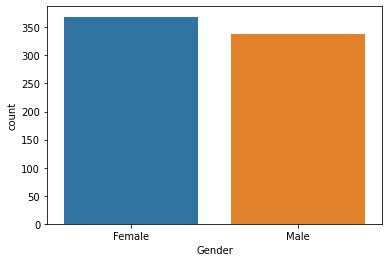

In [ ]:
sns.countplot(Sales.Gender)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

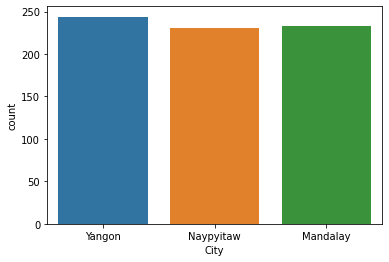

In [ ]:
sns.countplot(Sales.City)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product line', ylabel='count'>

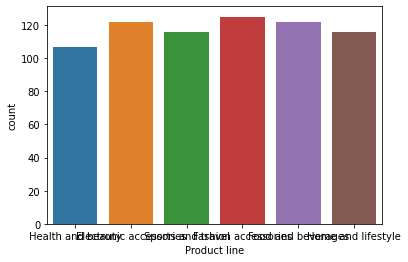

In [ ]:
sns.countplot(Sales['Product line'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

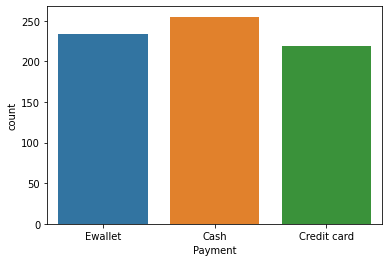

In [ ]:
sns.countplot(Sales.Payment)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer type', ylabel='count'>

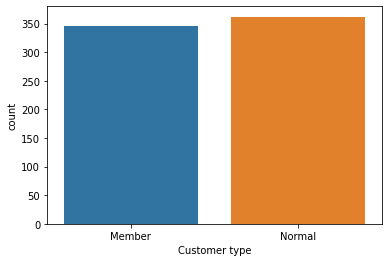

In [ ]:
sns.countplot(Sales['Customer type'])

# TASK 2

In [ ]:
matrix = Sales.corr()

In [ ]:
print(matrix)

            Unit price  Quantity    Tax 5%     Total      cogs    Rating
Unit price    1.000000 -0.013171  0.638495  0.638495  0.638495 -0.002824
Quantity     -0.013171  1.000000  0.683577  0.683577  0.683577 -0.006913
Tax 5%        0.638495  0.683577  1.000000  1.000000  1.000000 -0.019554
Total         0.638495  0.683577  1.000000  1.000000  1.000000 -0.019554
cogs          0.638495  0.683577  1.000000  1.000000  1.000000 -0.019554
Rating       -0.002824 -0.006913 -0.019554 -0.019554 -0.019554  1.000000


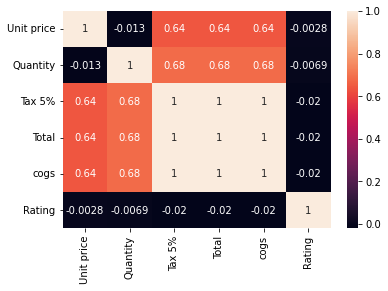

In [ ]:
ax = sns.heatmap(matrix, annot=True)

# Inference: Rating is irrelevant to all other variables and Tax, Total and cogs is highly correlated to Quantity. Finally, Total, cogs and Tax are fully correlated with each other.

# Bivariate plots

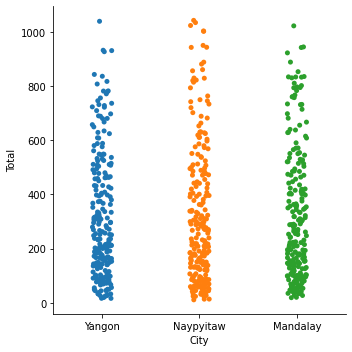

In [ ]:
sns.catplot(data=Sales, x="City", y="Total")

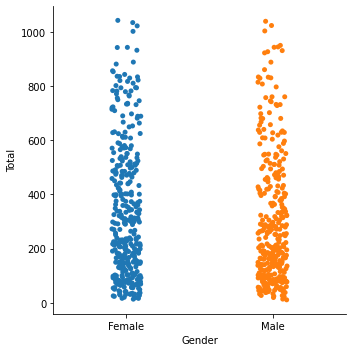

In [ ]:
sns.catplot(data=Sales, x="Gender", y="Total")

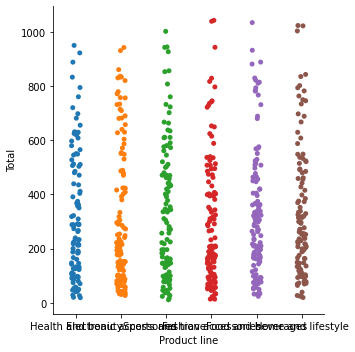

In [ ]:
sns.catplot(data=Sales, x="Product line", y="Total")

In [ ]:
three_tab = pd.crosstab([Sales['Product line'],Sales['Gender']], Sales['City'])

In [ ]:
three_tab

City                           Mandalay  Naypyitaw  Yangon
Product line           Gender                             
Electronic accessories Female        24         18      21
                       Male          18         17      24
Fashion accessories    Female        22         27      22
                       Male          14         22      18
Food and beverages     Female        22         27      15
                       Male          14         16      28
Health and beauty      Female        15         20      12
                       Male          24         20      16
Home and lifestyle     Female        15         20      27
                       Male          19         15      20
Sports and travel      Female        25         18      19
                       Male          21         11      22

In [ ]:
three_tab1 = pd.crosstab([Sales['Customer type'],Sales['Gender']], Sales['City'])
three_tab1

City                  Mandalay  Naypyitaw  Yangon
Customer type Gender                             
Member        Female        63         64      58
              Male          47         51      63
Normal        Female        60         66      58
              Male          63         50      65

In [ ]:
prop = pd.crosstab(index=Sales['Customer type'], columns=Sales["Gender"],
normalize='columns',margins=True)
prop

Gender,Female,Male,All
Customer type,,,
Member,0.501355,0.474926,0.488701
Normal,0.498645,0.525074,0.511299


In [ ]:
prop1 = pd.crosstab(index=Sales['Payment'], columns=Sales["Customer type"],
normalize='columns',margins=True)
prop1

Customer type,Member,Normal,All
Payment,,,
Cash,0.341040,0.378453,0.360169
Credit card,0.352601,0.267956,0.309322
Ewallet,0.306358,0.353591,0.330508


<AxesSubplot:xlabel='Quantity', ylabel='Tax 5%'>

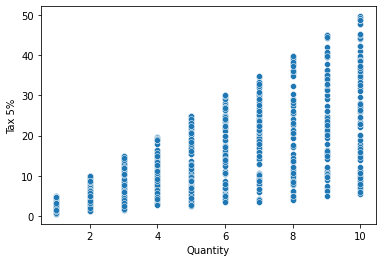

In [ ]:
sns.scatterplot(x='Quantity', y='Tax 5%', data=Sales)

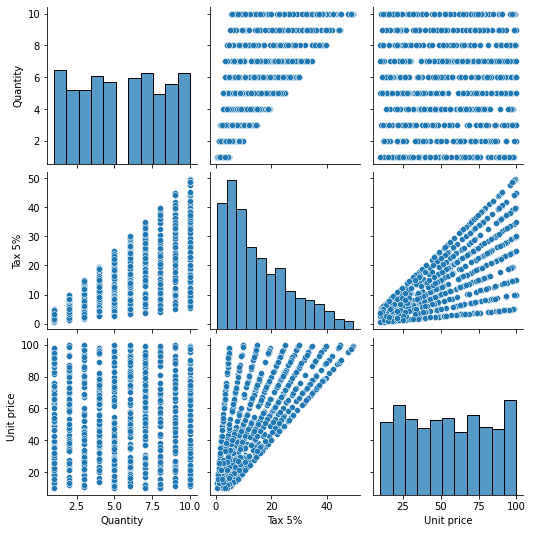

In [ ]:
sns.pairplot(data=Sales[['Gender','Quantity','Tax 5%', 'Unit price']])

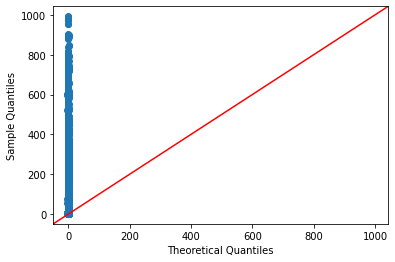

In [ ]:
fig = sm.qqplot(Sales[['cogs','Quantity']], line='45')
plt.show()

In [ ]:
skew(Sales[['cogs','Quantity']], bias=False)

array([ 0.91325491, -0.0104976 ])

In [ ]:
kurtosis(Sales[['cogs','Quantity']], bias=False)

array([ 0.00164092, -1.20110457])

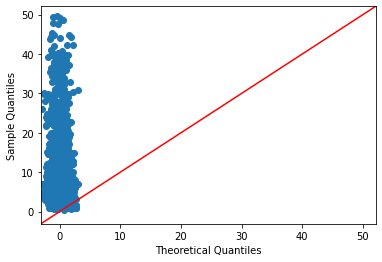

In [ ]:
fig = sm.qqplot(Sales[['Tax 5%','Quantity']], line='45')
plt.show()

In [ ]:
skew(Sales[['Tax 5%','Quantity']], bias=False)

array([ 0.91325491, -0.0104976 ])

In [ ]:
kurtosis(Sales[['Tax 5%','Quantity']], bias=False)

array([ 0.00164092, -1.20110457])

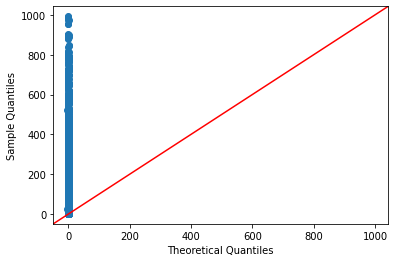

In [ ]:
fig = sm.qqplot(Sales[['cogs','Tax 5%']], line='45')
plt.show()

In [ ]:
skew(Sales[['cogs','Tax 5%']], bias=False)

array([0.91325491, 0.91325491])

In [ ]:
kurtosis(Sales[['cogs','Tax 5%']], bias=False)

array([0.00164092, 0.00164092])

# Above is Highly correlated

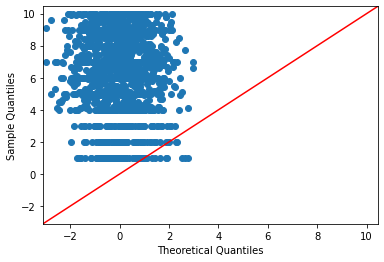

In [ ]:
fig = sm.qqplot(Sales[['Rating','Quantity']], line='45')
plt.show()

In [ ]:
skew(Sales[['Rating','Quantity']], bias=False)

array([ 0.01527956, -0.0104976 ])

In [ ]:
kurtosis(Sales[['Rating','Quantity']], bias=False)

array([-1.17625382, -1.20110457])

# Above is Least correlated, done from a contrast perspective

Task3 - Statistical Intference

- State and carry out two 1-sample hypothesis test for a numerical variable (use mean or median)


1.   quantity value ( mean )
2.   Rating (mean)



We  take the look into the quantity value in each order and test the hypothesis that mean order quantity of any indepdent orders would be 5 .
so,
 NULL hypothesis of mean order size != 5 And,
 Alternate Hypothesis of mean order size = 5

In [ ]:
Quantity_Data= Sales.Quantity

In [ ]:
Quantity_Data

0      7.0
1      5.0
4      7.0
5      7.0
10     4.0
      ... 
977    6.0
978    1.0
997    1.0
998    1.0
999    7.0
Name: Quantity, Length: 708, dtype: float64

In [ ]:
t_Result= stats.ttest_1samp(Quantity_Data, popmean = 5 )

In [ ]:
t_Result

TtestResult(statistic=4.675573228033821, pvalue=3.5113900853787058e-06, df=707)

In the above result we see that t_stat > 2 and pValue is < 0.1, which indicate a high level of confidence in the the mean of the order size is 5

In [ ]:
q_data1= Quantity_Data.quantile(np.arange(0.25, 1, 0.25))

Now, we want test our hypothesis that expected average rating of order would be 8

In [ ]:
rating_Data = Sales['Rating']

In [ ]:
rating_Data

0      9.1
1      9.6
4      5.3
5      4.1
10     4.5
      ... 
977    4.9
978    5.1
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 708, dtype: float64

In [ ]:
stats.ttest_1samp(rating_Data, popmean=8)

TtestResult(statistic=-16.1955432367233, pvalue=2.0737283319699203e-50, df=707)

From the above result we can tell the absolute valueof  t_stats is very high and pvalue is very less, which indicate the it is highly likely to get 8 as avarage rating in the sales order

**one 2-sample hypothesis test for numerical variables Qunatity vs Rating.
NULL Hypothesis = idependent
Alternate hypothesis = Rating depends on Qunatity

In [ ]:
stats.ttest_ind(Sales['Quantity'],Sales['Rating'])

Ttest_indResult(statistic=-11.357171065664613, pvalue=1.1433804362734958e-28)

In [ ]:
stats.ttest_rel(Sales['Quantity'],Sales['Rating'])

TtestResult(statistic=-11.322846835293863, pvalue=1.978191891229958e-27, df=707)

From the above Hypothesis test it is clear that there is a evidence to support impact of order quantitiy on the overall rating for the order,  bigger order szie in terms of quantity will have the more probablity to for higher rating.

2  Sample Hypothesis Test using proportion

In [ ]:
GenderTab = pd.crosstab(Sales['Gender'], Sales['Product line'])

In [ ]:
GenderTab

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,63,71,64,47,62,62
Male,59,54,58,60,54,54


In [ ]:
chi2_contingency(GenderTab)

Chi2ContingencyResult(statistic=4.1573950366765455, pvalue=0.5269847987103085, dof=5, expected_freq=array([[63.58474576, 65.14830508, 63.58474576, 55.76694915, 60.45762712,
        60.45762712],
       [58.41525424, 59.85169492, 58.41525424, 51.23305085, 55.54237288,
        55.54237288]]))

From the abpve it clear that expected prodcut type sales are independent of  gender type as pvalue > 0.1

from the above three hypothesis tests, we can conclude follwing conclusions:
- expected mean of the qunatity of the sales are 5
- expected means of rating is 8
- there is a relation between Quantity and Rating of the sales
- any prrefrence of purchasing of product types are independent of sex